# Wstęp do uczenia maszynowego

## Czym jest uczenie maszynowe?

**Uczenie maszynowe** (ang. *Machine Learning*, ML) to dziedzina sztucznej inteligencji, która umożliwia komputerom uczenie się na podstawie danych bez konieczności jawnego programowania każdej reguły. Zamiast tego algorytmy uczenia maszynowego automatycznie wykrywają wzorce i zależności w danych, wykorzystując je później do podejmowania decyzji lub przewidywań.

### Po co w ogóle uczenie maszynowe?

Czasy mamy takie, że świat dookoła generuje ogromne ilości danych. Tradycyjne metody programowania nie są w stanie efektywnie poradzić sobie z analizą tak dużych i złożonych zbiorów danych. Uczenie maszynowe pozwala na:

- **Automatyzację** podejmowania decyzji
- **Wykrywanie wzorców** niewidocznych dla człowieka
- **Przewidywanie** przyszłych zdarzeń na podstawie danych historycznych
- **Personalizację** usług (np. rekomendacje w serwisach streamingowych)
- **Rozpoznawanie obrazów i mowy**

## Rodzaje uczenia maszynowego

Uczenie maszynowe dzieli się na kilka głównych kategorii:

### 1. Uczenie nadzorowane (Supervised Learning)

W uczeniu nadzorowanym algorytm uczy się na podstawie **danych z etykietami** (czyli znamy poprawne odpowiedzi). Model analizuje przykłady treningowe i uczy się przewidywać wyniki dla nowych, nieznanych danych.

**Przykłady zastosowań:**
- **Klasyfikacja**: Rozpoznawanie, czy email to spam czy nie (dwie klasy)
- **Regresja**: Przewidywanie ceny mieszkania na podstawie jego cech
- Diagnozowanie chorób na podstawie objawów
- Rozpoznawanie pisma ręcznego

### 2. Uczenie nienadzorowane (Unsupervised Learning)

W tym przypadku algorytm pracuje z **danymi bez etykiet**. Jego zadaniem jest znalezienie ukrytych struktur i wzorców w danych.

**Przykłady zastosowań:**
- **Grupowanie (clustering)**: Segmentacja klientów na podstawie ich zachowań
- **Redukcja wymiarowości**: Uproszczenie złożonych danych przy zachowaniu najważniejszych informacji
- Wykrywanie anomalii (np. oszustw)

### 3. Uczenie ze wzmocnieniem (Reinforcement Learning)

Agent uczy się podejmować decyzje poprzez **interakcję ze środowiskiem** i otrzymywanie nagród lub kar za swoje działania.

**Przykłady zastosowań:**
- Gry komputerowe (np. AlphaGo)
- Autonomiczne pojazdy
- Roboty

## Podstawowe pojęcia

### Cechy (Features)
To zmienne wejściowe, które opisują nasze dane. Na przykład dla przewidywania ceny domu cechami mogą być: powierzchnia, liczba pokoi, lokalizacja itp.

### Etykiety (Labels)
To wartości, które chcemy przewidzieć. W przypadku klasyfikacji to klasy (np. spam/nie-spam), a w regresji to wartości numeryczne (np. cena).

### Zbiór treningowy i testowy
- **Zbiór treningowy**: Dane, na których model się uczy
- **Zbiór testowy**: Dane, na których sprawdzamy, jak dobrze model radzi sobie z nowymi, nieznanymi przykładami


### *Mogą się pojawić kłopoty*:

### Przeuczenie (Overfitting)
Sytuacja, gdy model zbyt dobrze "zapamiętał" dane treningowe i nie potrafi niczego uogólnić na nowe dane.

### Niedouczenie (Underfitting)
Sytuacja, gdy model jest zbyt prosty i nie potrafi uchwycić wzorców w danych.

## Typowy proces uczenia maszynowego

1. **Zbieranie danych**: Pozyskanie odpowiedniego zbioru danych
2. **Przygotowanie danych**: Czyszczenie, normalizacja, obsługa brakujących wartości
3. **Wybór modelu**: Decyzja o tym, jaki algorytm zastosować
4. **Trenowanie modelu**: Uczenie modelu na danych treningowych
5. **Ewaluacja**: Sprawdzenie jakości modelu na danych testowych
6. **Optymalizacja**: Dostrajanie parametrów dla lepszych wyników
7. **Wdrożenie**: Użycie modelu w praktyce

## Popularne biblioteki w Pythonie

- **scikit-learn**: Wszechstronna biblioteka z algorytmami ML
- **pandas**: Manipulacja i analiza danych
- **numpy**: Operacje na tablicach i macierzach
- **matplotlib/seaborn**: Wizualizacja danych
- **TensorFlow/PyTorch**: Głębokie uczenie (deep learning)

---

# Pierwszy praktyczny przykład: Klasyfikacja binarna

Przejdźmy teraz do konkretnego przykładu. Stworzymy prosty model klasyfikacji binarnej wykorzystując algorytm **Random Forest** (Las losowy).

## Krok 1: Import bibliotek

Zaczniemy od zaimportowania niezbędnych bibliotek do pracy z danymi i budowy modelu.

In [1]:
# Biblioteki do obliczeń numerycznych i analizy danych
import numpy as np
import pandas as pd

# Biblioteki do wizualizacji
import matplotlib.pyplot as plt
import seaborn as sns

# Ustawienia dla lepszej czytelności wykresów
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# Ignorowanie ostrzeżeń (żeby output był "czystszy")
import warnings
warnings.filterwarnings('ignore')

# Biblioteki scikit-learn do uczenia maszynowego
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    classification_report,
    roc_auc_score,
    roc_curve
)

# Ustawienie "ziarna" dla generatora liczb losowych w celu uzyskania powtarzalności wyników
np.random.seed(42)

print("Biblioteki zaimportowane pomyślnie! ✓")

Biblioteki zaimportowane pomyślnie! ✓


## Krok 2: Generowanie danych syntetycznych

Do celów demonstracyjnych stworzymy sztuczny zbiór danych do klasyfikacji. W praktyce używalibyśmy rzeczywistych danych, ale syntetyczne dane pozwalają nam kontrolować wszystkie parametry problemu.

In [2]:
# Generowanie syntetycznego zbioru danych do klasyfikacji binarnej
X, y = make_classification(
    n_samples=10000,      # liczba próbek
    n_features=10,        # liczba cech
    n_informative=8,      # liczba cech informatywnych (wpływających na wynik)
    n_redundant=2,        # liczba cech nadmiarowych
    n_classes=2,          # liczba klas (klasyfikacja binarna)
    random_state=42,      # dla powtarzalności
    flip_y=0.1            # 10% szumu w etykietach (symulacja błędów)
)

print(f"Utworzono zbiór danych:")
print(f"  - Liczba próbek: {X.shape[0]}")
print(f"  - Liczba cech: {X.shape[1]}")
print(f"  - Rozkład klas: Klasa 0: {np.sum(y==0)}, Klasa 1: {np.sum(y==1)}")
print(f"  - Typ danych X: {type(X)}")
print(f"  - Typ danych y: {type(y)}")

Utworzono zbiór danych:
  - Liczba próbek: 10000
  - Liczba cech: 10
  - Rozkład klas: Klasa 0: 5028, Klasa 1: 4972
  - Typ danych X: <class 'numpy.ndarray'>
  - Typ danych y: <class 'numpy.ndarray'>


## Krok 3: Konwersja do DataFrames pandas

Pandas to biblioteka ułatwiająca pracę z danymi tabelarycznymi. Przekonwertujemy nasze dane (typów, zdefiniowanych w bibliotece) numpy do formatu DataFrame ("ramki danych"), co ułatwi ich analizę i wizualizację.

In [3]:
# Konwersja do pandas DataFrame z odpowiednimi nazwami kolumn
feature_names = [f'cecha_{i+1}' for i in range(X.shape[1])]
X_df = pd.DataFrame(X, columns=feature_names)
y_df = pd.DataFrame(y, columns=['klasa'])

print(f"Kształt danych:")
print(f"  - X_df: {X_df.shape}")
print(f"  - y_df: {y_df.shape}")
print(f"\nPierwsze 5 wierszy cech (X):")
display(X_df.head())
print(f"\nPierwsze 5 etykiet (y):")
display(y_df.head())

Kształt danych:
  - X_df: (10000, 10)
  - y_df: (10000, 1)

Pierwsze 5 wierszy cech (X):


,cecha_1,cecha_2,cecha_3,cecha_4,cecha_5,cecha_6,cecha_7,cecha_8,cecha_9,cecha_10
0,4.883592,-4.086414,0.055201,-1.501626,0.434716,0.929526,0.427166,-0.098062,0.162102,-0.674262
1,1.617723,0.091073,-1.583931,-0.178106,0.225610,-0.697776,-1.627400,0.109911,2.614167,-0.068870
2,-9.198244,-1.583987,-2.217921,0.349554,5.243305,-3.434703,1.562761,1.580395,-4.184442,-1.380812
3,-4.146199,2.189699,-2.109988,0.212818,-0.023965,-1.989150,2.001709,-0.895136,1.204108,-0.539487
4,-2.365301,1.141892,-1.231185,1.606763,0.347243,-3.104923,2.245082,0.707284,-0.179552,3.559585



Pierwsze 5 etykiet (y):


,klasa
0,1
1,0
2,0
3,1
4,0


## Krok 4: Analiza eksploracyjna danych (EDA)

Przed budową modelu warto poznać nasze dane. Sprawdzimy podstawowe statystyki i wizualizacje.

In [4]:
# Podstawowe statystyki opisowe
print("Statystyki opisowe cech:")
display(X_df.describe())

# Sprawdzenie, czy brakuje jakichś wartości
print(f"\nLiczba brakujących wartości w X: {X_df.isnull().sum().sum()}")
print(f"Liczba brakujących wartości w y: {y_df.isnull().sum().sum()}")

Statystyki opisowe cech:


,cecha_1,cecha_2,cecha_3,cecha_4,cecha_5,cecha_6,cecha_7,cecha_8,cecha_9,cecha_10
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,-0.932588,0.002030,-0.970986,0.986822,-0.495842,-0.508307,0.494077,-0.498248,0.010645,0.513540
std,3.881307,2.037718,1.702145,1.680416,1.850907,1.936390,1.607506,2.613448,1.997441,1.731811
min,-15.944379,-7.102671,-7.442351,-5.559254,-7.394572,-7.803354,-6.033566,-10.476747,-6.982064,-6.156499
25%,-3.578318,-1.376583,-2.102693,-0.104993,-1.742369,-1.827907,-0.545721,-2.220386,-1.317776,-0.673676
50%,-1.083058,0.125829,-0.951348,1.008356,-0.578589,-0.567991,0.593502,-0.581974,0.054258,0.543905
75%,1.595906,1.402843,0.164727,2.107281,0.705800,0.785883,1.590028,1.082934,1.404745,1.693135
max,14.327434,6.842219,5.611381,7.749314,6.307248,7.004232,6.472601,10.528498,6.936276,6.841451



Liczba brakujących wartości w X: 0
Liczba brakujących wartości w y: 0


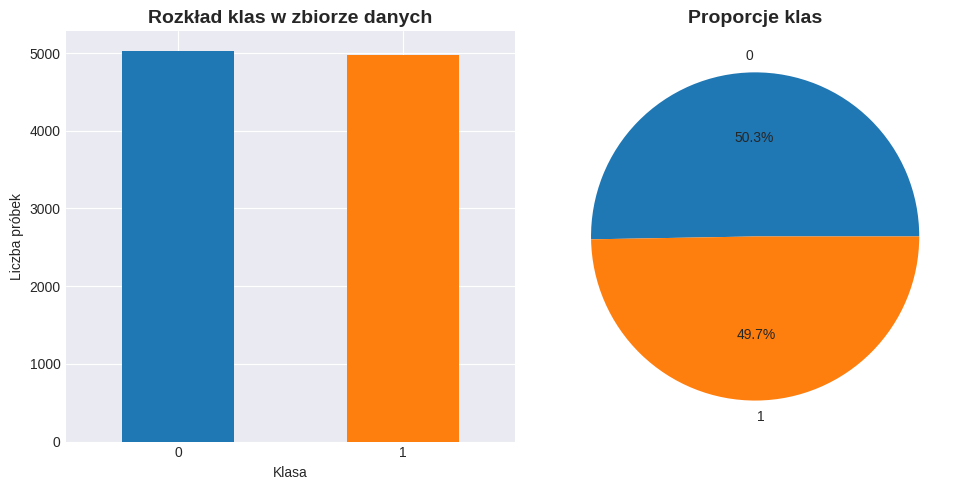


Wnioski z analizy rozkładu klas:
  ✓ Klasy są dobrze zbalansowane


In [5]:
# Wizualizacja rozkładu klas
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
y_df['klasa'].value_counts().plot(kind='bar', color=['#1f77b4', '#ff7f0e'])
plt.title('Rozkład klas w zbiorze danych', fontsize=14, fontweight='bold')
plt.xlabel('Klasa')
plt.ylabel('Liczba próbek')
plt.xticks(rotation=0)

plt.subplot(1, 2, 2)
y_df['klasa'].value_counts().plot(kind='pie', autopct='%1.1f%%',
                                   colors=['#1f77b4', '#ff7f0e'])
plt.title('Proporcje klas', fontsize=14, fontweight='bold')
plt.ylabel('')

plt.tight_layout()
plt.show()

print(f"\nWnioski z analizy rozkładu klas:")
class_balance = y_df['klasa'].value_counts(normalize=True)
if abs(class_balance[0] - class_balance[1]) < 0.1:
    print("  ✓ Klasy są dobrze zbalansowane")
else:
    print("  ⚠ Klasy są niezbalansowane - może być potrzebne ważenie lub resampling")

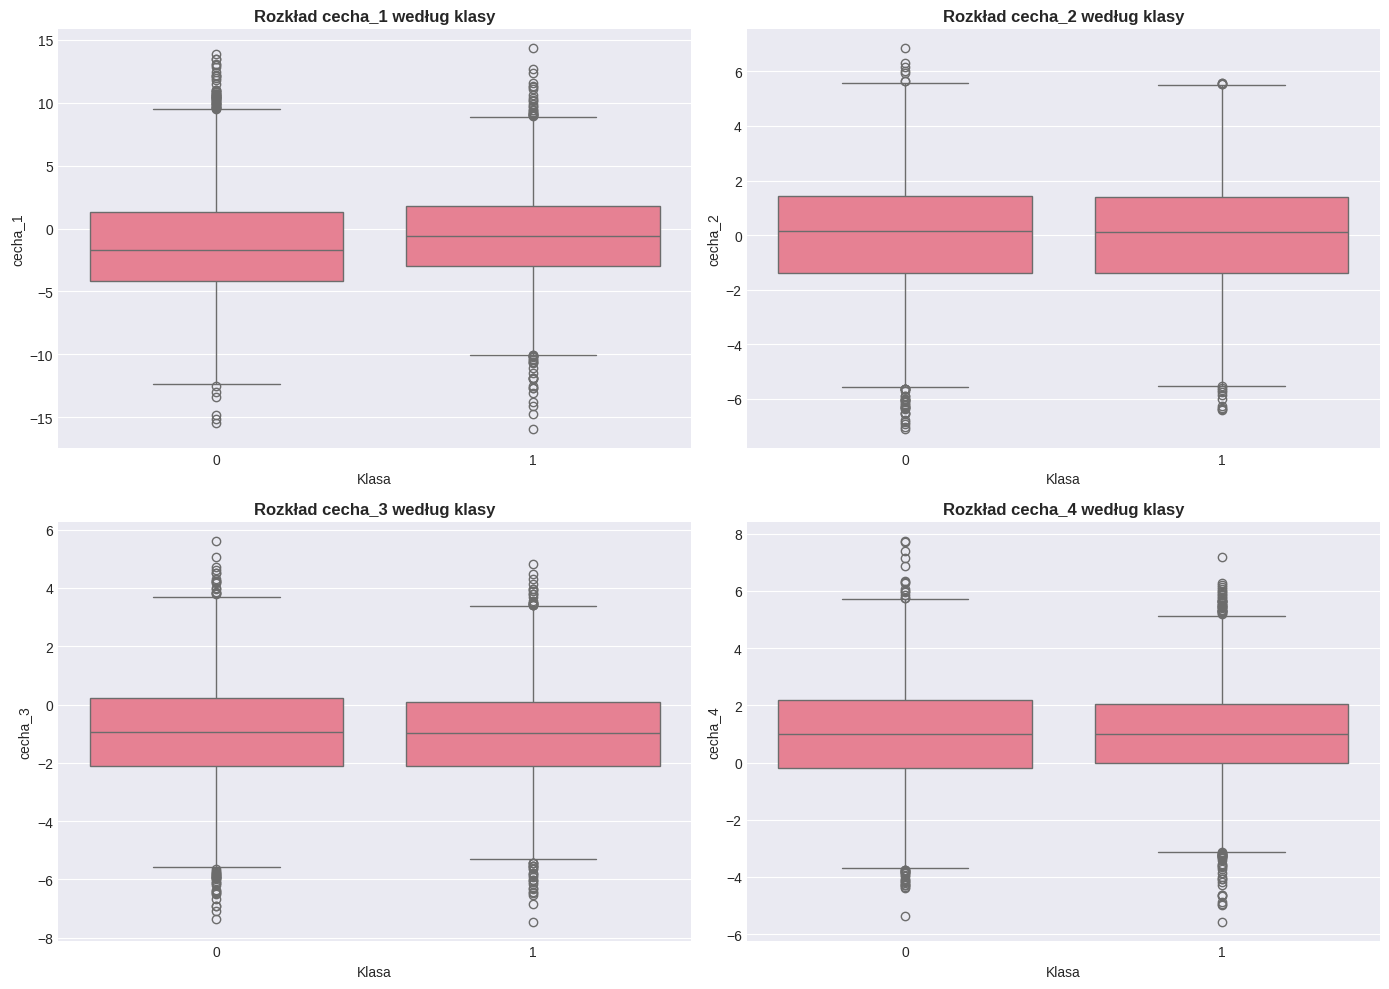

In [6]:
# Wizualizacja przykładowych cech
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Wykresy pudełkowe dla pierwszych 4 cech
for idx, ax in enumerate(axes.flat):
    feature_name = f'cecha_{idx+1}'
    sns.boxplot(data=X_df, x=y_df['klasa'], y=feature_name, ax=ax)
    ax.set_title(f'Rozkład {feature_name} według klasy', fontweight='bold')
    ax.set_xlabel('Klasa')
    ax.set_ylabel(feature_name)

plt.tight_layout()
plt.show()

## Krok 5: Podział danych na zbiór treningowy i testowy

Dzielimy nasze dane na dwie części:
- **Zbiór treningowy (80%)**: Do uczenia modelu
- **Zbiór testowy (20%)**: Do oceny wydajności modelu na nowych danych

In [7]:
# Podział danych 80/20
X_train, X_test, y_train, y_test = train_test_split(
    X_df,
    y_df,
    test_size=0.2,        # 20% danych do testu
    random_state=42,      # dla powtarzalności
    stratify=y_df         # zachowanie proporcji klas w obu zbiorach
)

print(f"Podział danych:")
print(f"  - Rozmiar zbioru treningowego: {X_train.shape[0]} próbek ({X_train.shape[0]/len(X_df)*100:.1f}%)")
print(f"  - Rozmiar zbioru testowego: {X_test.shape[0]} próbek ({X_test.shape[0]/len(X_df)*100:.1f}%)")
print(f"\nRozkład klas w zbiorze treningowym:")
print(y_train['klasa'].value_counts())
print(f"\nRozkład klas w zbiorze testowym:")
print(y_test['klasa'].value_counts())

Podział danych:
  - Rozmiar zbioru treningowego: 8000 próbek (80.0%)
  - Rozmiar zbioru testowego: 2000 próbek (20.0%)

Rozkład klas w zbiorze treningowym:
klasa
0    4022
1    3978
Name: count, dtype: int64

Rozkład klas w zbiorze testowym:
klasa
0    1006
1     994
Name: count, dtype: int64


## Krok 6: Standaryzacja danych

Wiele algorytmów ML działa lepiej, gdy cechy mają podobny zakres wartości. Standaryzacja przekształca cechy tak, aby miały średnią 0 i odchylenie standardowe 1.

In [8]:
# Inicjalizacja skalera
scaler = StandardScaler()

# Dopasowanie skalera tylko do danych treningowych (ważne!)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)  # użycie parametrów ze zbioru treningowego

# Konwersja z powrotem do DataFrame dla wygody
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

print("Standaryzacja zakończona ✓")
print(f"\nPrzykład - Statystyki pierwszej cechy przed standaryzacją:")
print(f"  Średnia: {X_train.iloc[:, 0].mean():.3f}")
print(f"  Odchylenie std: {X_train.iloc[:, 0].std():.3f}")
print(f"\nPrzykład - Statystyki pierwszej cechy po standaryzacji:")
print(f"  Średnia: {X_train_scaled.iloc[:, 0].mean():.3f}")
print(f"  Odchylenie std: {X_train_scaled.iloc[:, 0].std():.3f}")

Standaryzacja zakończona ✓

Przykład - Statystyki pierwszej cechy przed standaryzacją:
  Średnia: -0.948
  Odchylenie std: 3.868

Przykład - Statystyki pierwszej cechy po standaryzacji:
  Średnia: 0.000
  Odchylenie std: 1.000


## Krok 7: Budowa i trenowanie modelu Random Forest

**Random Forest** (Las losowy) to dobry allgorytm uczenia maszynowego, który:
- Tworzy wiele drzew decyzyjnych
- Każde drzewo uczy się na losowym podzbiorze danych
- Końcowa predykcja to "głosowanie" wszystkich drzew

Zalety Random Forest:
- Wysoka dokładność
- Odporność na przeuczenie
- Możliwość oceny ważności cech
- Działa dobrze "out of the box" (bez konieczności strojenia)

In [9]:
# Inicjalizacja modelu Random Forest
model = RandomForestClassifier(
    n_estimators=100,      # liczba drzew w lesie
    max_depth=10,          # maksymalna głębokość drzew
    min_samples_split=5,   # minimalna liczba próbek do podziału węzła
    min_samples_leaf=2,    # minimalna liczba próbek w liściu drzewa
    random_state=42,       # dla powtarzalności
    n_jobs=-1,             # użycie wszystkich dostępnych rdzeni procesora
    verbose=0
)

print("Rozpoczynam trenowanie modelu...")
print("="*50)

# Trenowanie modelu
model.fit(X_train_scaled, y_train.values.ravel())

print("\nModel wytrenowany pomyślnie! ✓")
print(f"Liczba drzew w lesie: {model.n_estimators}")
print(f"Maksymalna głębokość drzew: {model.max_depth}")

Rozpoczynam trenowanie modelu...

Model wytrenowany pomyślnie! ✓
Liczba drzew w lesie: 100
Maksymalna głębokość drzew: 10


## Krok 8: Predykcja i ewaluacja modelu

Teraz sprawdzimy, jak dobrze nasz model radzi sobie z przewidywaniem klas na nowych, niewidzianych wcześniej danych (zbiór testowy).

In [10]:
# Predykcja na zbiorze treningowym
y_train_pred = model.predict(X_train_scaled)
train_accuracy = accuracy_score(y_train, y_train_pred)

# Predykcja na zbiorze testowym
y_test_pred = model.predict(X_test_scaled)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Prawdopodobieństwa dla krzywej ROC
y_test_proba = model.predict_proba(X_test_scaled)[:, 1]
roc_auc = roc_auc_score(y_test, y_test_proba)

print("="*50)
print("WYNIKI EWALUACJI MODELU")
print("="*50)
print(f"\nDokładność na zbiorze treningowym: {train_accuracy:.4f} ({train_accuracy*100:.2f}%)")
print(f"Dokładność na zbiorze testowym:     {test_accuracy:.4f} ({test_accuracy*100:.2f}%)")
print(f"ROC AUC Score:                      {roc_auc:.4f}")

# Sprawdzenie przeuczenia
overfitting_diff = train_accuracy - test_accuracy
print(f"\nRóżnica między dokładnością (trening - test): {overfitting_diff:.4f}")
if overfitting_diff < 0.05:
    print("  ✓ Model nie jest przeuczony")
elif overfitting_diff < 0.1:
    print("  ⚠ Lekkie przeuczenie")
else:
    print("  ✗ Znaczące przeuczenie")

WYNIKI EWALUACJI MODELU

Dokładność na zbiorze treningowym: 0.9234 (92.34%)
Dokładność na zbiorze testowym:     0.8820 (88.20%)
ROC AUC Score:                      0.9361

Różnica między dokładnością (trening - test): 0.0414
  ✓ Model nie jest przeuczony


### Macierz pomyłek (Confusion Matrix)

Macierz pomyłek pokazuje szczegółowo, jak model klasyfikuje próbki:
- **True Negatives (TN)**: Poprawnie sklasyfikowane jako klasa 0
- **True Positives (TP)**: Poprawnie sklasyfikowane jako klasa 1
- **False Positives (FP)**: Błędnie sklasyfikowane jako klasa 1 (błąd typu I)
- **False Negatives (FN)**: Błędnie sklasyfikowane jako klasa 0 (błąd typu II)

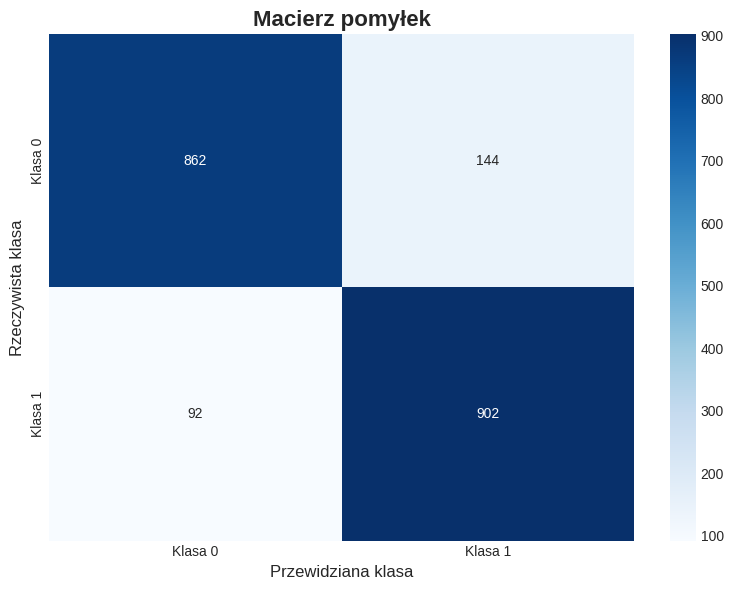


Szczegóły macierzy pomyłek:
  True Negatives (TN):  862
  False Positives (FP): 144
  False Negatives (FN): 92
  True Positives (TP):  902


In [11]:
# Wygenerowanie macierzy pomyłek
cm = confusion_matrix(y_test, y_test_pred)

# Wizualizacja macierzy pomyłek
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=True,
            xticklabels=['Klasa 0', 'Klasa 1'],
            yticklabels=['Klasa 0', 'Klasa 1'])
plt.title('Macierz pomyłek', fontsize=16, fontweight='bold')
plt.ylabel('Rzeczywista klasa', fontsize=12)
plt.xlabel('Przewidziana klasa', fontsize=12)
plt.tight_layout()
plt.show()

# Wyświetlenie szczegółowych wartości
tn, fp, fn, tp = cm.ravel()
print(f"\nSzczegóły macierzy pomyłek:")
print(f"  True Negatives (TN):  {tn}")
print(f"  False Positives (FP): {fp}")
print(f"  False Negatives (FN): {fn}")
print(f"  True Positives (TP):  {tp}")

### Raport klasyfikacji

Raport zawiera szczegółowe metryki dla każdej klasy:
- **Precision (Precyzja)**: Jaki procent pozytywnych predykcji był prawidłowy?
- **Recall (Czułość)**: Jaki procent rzeczywistych pozytywnych przypadków został wykryty?
- **"F1-Score"**: Harmoniczna średnia precision i recall
- **Support**: Liczba rzeczywistych wystąpień każdej klasy

In [12]:
# Szczegółowy raport klasyfikacji
print("\n" + "="*50)
print("RAPORT KLASYFIKACJI")
print("="*50)
print(classification_report(y_test, y_test_pred,
                          target_names=['Klasa 0', 'Klasa 1']))


RAPORT KLASYFIKACJI
              precision    recall  f1-score   support

     Klasa 0       0.90      0.86      0.88      1006
     Klasa 1       0.86      0.91      0.88       994

    accuracy                           0.88      2000
   macro avg       0.88      0.88      0.88      2000
weighted avg       0.88      0.88      0.88      2000



### Krzywa ROC (Receiver Operating Characteristic)

Krzywa ROC pokazuje zależność między współczynnikiem prawdziwie dodatnim (TPR) a współczynnikiem fałszywie dodatnim (FPR) dla różnych progów klasyfikacji. Pole pod krzywą (AUC) jest miarą ogólnej jakości modelu:
- **AUC = 1.0**: Idealny klasyfikator
- **AUC = 0.5**: Klasyfikator losowy
- **AUC > 0.8**: Bardzo dobry model

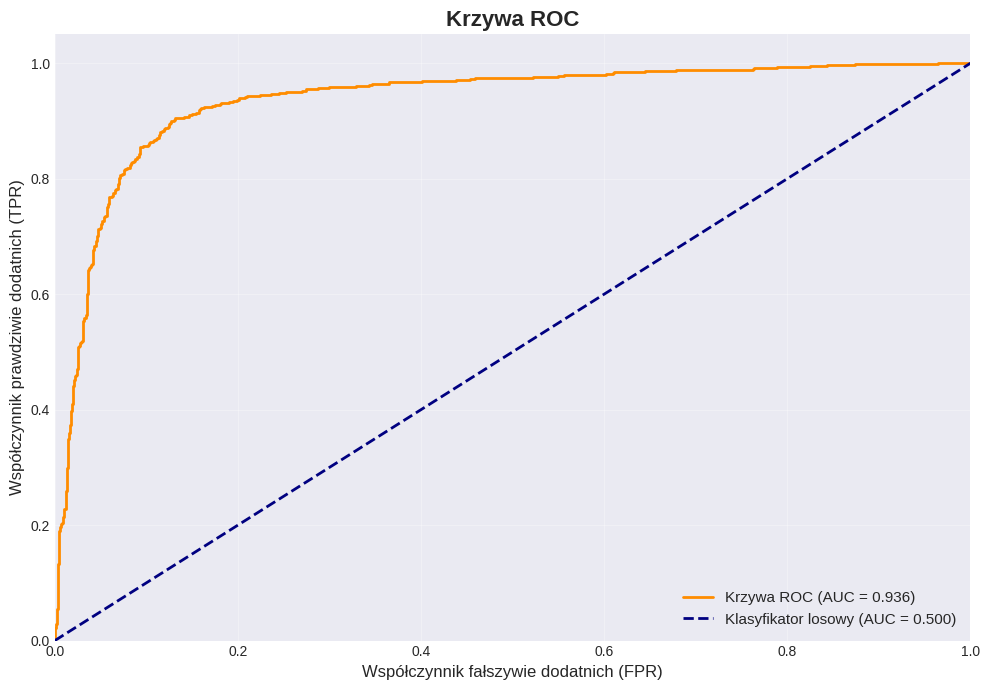

In [13]:
# Obliczenie krzywej ROC
fpr, tpr, thresholds = roc_curve(y_test, y_test_proba)

# Wizualizacja krzywej ROC
plt.figure(figsize=(10, 7))
plt.plot(fpr, tpr, color='darkorange', lw=2,
         label=f'Krzywa ROC (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--',
         label='Klasyfikator losowy (AUC = 0.500)')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Współczynnik fałszywie dodatnich (FPR)', fontsize=12)
plt.ylabel('Współczynnik prawdziwie dodatnich (TPR)', fontsize=12)
plt.title('Krzywa ROC', fontsize=16, fontweight='bold')
plt.legend(loc="lower right", fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## Krok 9: Ważność cech

Jedną z zalet algorytmu "lasu losowego" jest możliwość określenia, które cechy były najważniejsze dla predykcji. Im wyższa wartość, tym większy wpływ cechy na model.


Ważność cech (posortowana malejąco):


,cecha,ważność
9,cecha_10,0.154351
6,cecha_7,0.131363
4,cecha_5,0.115084
3,cecha_4,0.093640
8,cecha_9,0.092287
7,cecha_8,0.091734
2,cecha_3,0.090806
5,cecha_6,0.090562
0,cecha_1,0.072126
1,cecha_2,0.068049


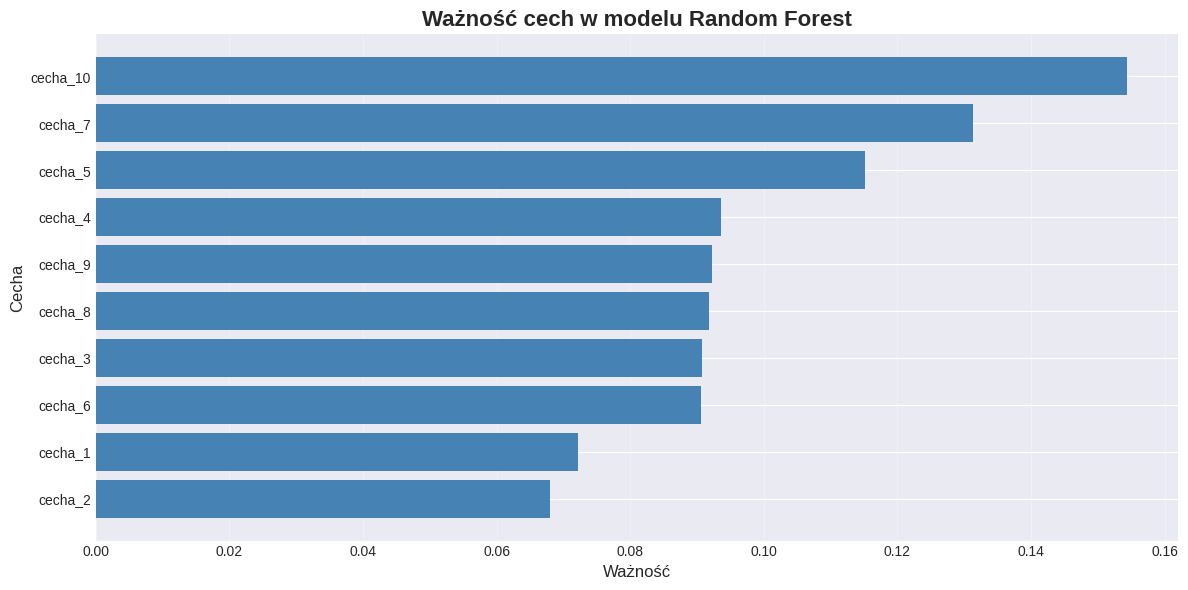

In [14]:
# Pobranie ważności cech
feature_importance = pd.DataFrame({
    'cecha': X_train.columns,
    'ważność': model.feature_importances_
}).sort_values('ważność', ascending=False)

print("\nWażność cech (posortowana malejąco):")
print("="*50)
display(feature_importance)

# Wizualizacja ważności cech
plt.figure(figsize=(12, 6))
plt.barh(feature_importance['cecha'], feature_importance['ważność'],
         color='steelblue')
plt.xlabel('Ważność', fontsize=12)
plt.ylabel('Cecha', fontsize=12)
plt.title('Ważność cech w modelu Random Forest', fontsize=16, fontweight='bold')
plt.gca().invert_yaxis()
plt.grid(True, alpha=0.3, axis='x')
plt.tight_layout()
plt.show()

## Podsumowanie

W tym notatniku:

1. Poznaliśmy podstawy uczenia maszynowego i jego główne rodzaje
2. Stworzyliśmy syntetyczny zbiór danych do klasyfikacji binarnej
3. Przeprowadziliśmy analizę eksploracyjną danych (EDA)
4. Przygotowaliśmy dane (podział train/test, standaryzacja)
5. Zbudowaliśmy i wytrenowaliśmy model Random Forest
6. Oceniliśmy jakość modelu używając różnych metryk
7. Zidentyfikowaliśmy najważniejsze cechy dla predykcji

### Następne kroki

Można rozwijać ten projekt np. poprzez:
- eksperymentowanie z innymi algorytmami (np. regresję logistyczną, SVM, XGBoost)
- optymalizację hiperparametrów (czyli parametrów samego algorytmu, w przeciwieństiwe do parametrów modelu; służą temu klasy GridSearchCV, RandomizedSearchCV)
- pracę z rzeczywistymi zbiorami danych
- implementację walidacji krzyżowej (czyli wielu różnych sposobów podziału na dane treningowe i testowe z końcowym uśrednianiem) w celu uzyskania bardziej wiarygodnej klasyfikacji
- próbę obsługi niezbalansowanych zbiorów danych (częstych w dziedzinie wykrywania oszustw ubezpieczeniowych)
- zapisywanie i wczytywanie wytrenowanych modeli

### Przydatne zasoby:
- [Dokumentacja scikit-learn](https://scikit-learn.org/stable/)
- [Kaggle](https://www.kaggle.com/) - platforma z zbiorami danych i konkursami uczenia maszynowego (można wygrać cenne nagrody finansowe)
- [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/) - repozytorium zbiorów danych

---
**Autor:** Asseco z udziałem Anthropic Claude'a. Notebook utworzony jako wstęp do uczenia maszynowego  
**Data:** 2024  
**Wersja:** 1.0